In [2]:
import numpy as np
import pylab as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

$u^{(l+1)} \equiv \frac{a}{Kv}$, $v^{(l+1)} \equiv \frac{b}{K^\top u}$

In [3]:
from scipy.stats import norm


t = np.arange(0, 1, 0.01)
mean = 0.3
std = 0.1

a = norm.pdf(t, mean, np.abs(std))


t = np.arange(0, 1, 0.02)

mean1 = 0.2
std1 = 0.05

mean2 = 0.7
std2 = 0.1

b = 0.4 * norm.pdf(t, mean1, np.abs(std1)) + 0.6 * norm.pdf(t, mean2, np.abs(std2))

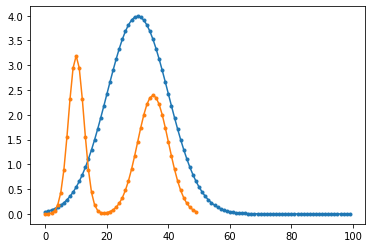

In [4]:
plt.plot(a, marker=".")
plt.plot(b, marker=".")

plt.show()

In [5]:
C = (np.expand_dims(a, 1) - np.expand_dims(b, 0))**2

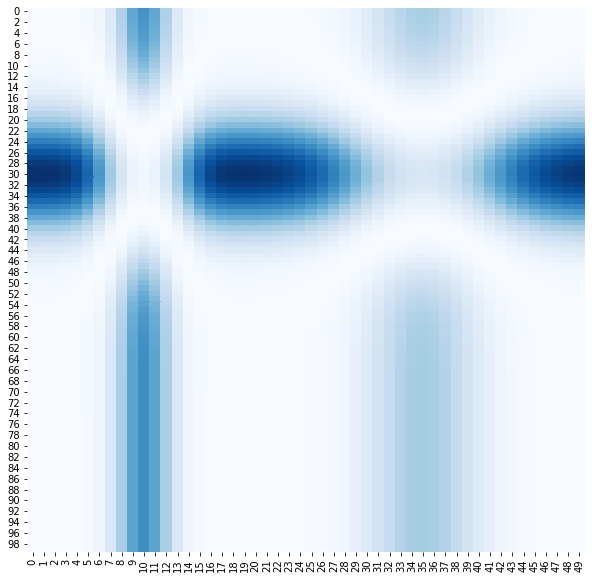

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(C, cmap="Blues", cbar=None, linewidths=0)
plt.show()

## Sinkhorn

In [25]:
n = a.shape[0]
m = b.shape[0]

epsilon =  10

v = np.ones(m)
K = np.exp(-C/epsilon)

In [26]:
for i in range(20):
    u = a/(K@v)
    v = b/(K.transpose()@u)

In [27]:
P = np.diag(u) @ K @ np.diag(v)

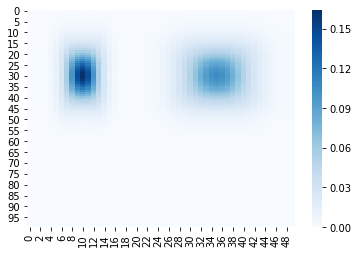

In [28]:
sns.heatmap(P, cmap="Blues")
plt.show()

(0, 50)

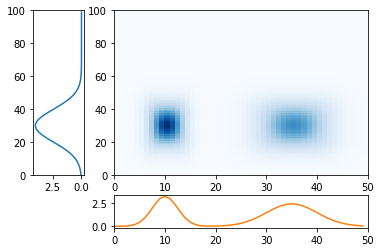

In [29]:
gs = gridspec.GridSpec(2, 2,
                   width_ratios=[1,5],
                   height_ratios=[5,1]
                   )
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax4 = plt.subplot(gs[3])

ax2.pcolor(P, cmap="Blues")

ax1.plot(a, range(n))
ax1.invert_xaxis()
ax1.set_ylim(0, n)

ax4.plot(b, c="C1")
ax4.set_xlim(0, m)